In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 

data_train = pd.read_csv('../input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip', sep = '\t')

In [2]:
data_train

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


## Cleaning the data

### Removing the HTML formatting

In [3]:
from bs4 import BeautifulSoup

for i in range(len(data_train)):
    data_train["review"][i] = BeautifulSoup(data_train["review"][i]).get_text()

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


### Removing punctuation

In [4]:
import re

for i in range(len(data_train)):
    data_train["review"][i] = re.sub("[,.;:'-*]", " ", data_train["review"][i])

### Converting to lower case

In [5]:
for i in range(len(data_train)):
    data_train["review"][i] = data_train["review"][i].lower()

### Removing stop words

In [6]:
import nltk
from nltk.corpus import stopwords

for w in stopwords.words('english'):
    data_train['review'] = data_train["review"].str.replace(' ' + str(w) + ' ', ' ')


### Stemming the words

In [7]:
from nltk.stem import LancasterStemmer

lancaster = LancasterStemmer()

for i in range(len(data_train)):
    data_train['review'][i] = data_train['review'][i].split(' ')
    data_train['review'][i] = [lancaster.stem(y) for y in data_train['review'][i]]
    data_train['review'][i] = ' '.join(data_train['review'][i])

In [8]:
data_train.head()

,id,sentiment,review
0,5814_8,1,with stuff going mom mj start list mus watch ...
1,2381_9,1,"\the class war worlds\"" timothy hin entertain ..."
2,7759_3,0,the film start man nichola bel giv welcom in...
3,3630_4,0,it must assum pra film \the greatest film ope...
4,9495_8,1,superbl trashy wondr unpretenty 80 exploit ho...


### Vectorization of the words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 5000) 

x = vectorizer.fit_transform(data_train['review']).toarray()
y = data_train['sentiment']

### Data split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=32)

### Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Predictions

Following algorithms have been compared:
* Naive Bayes
* Logistic Regression
* Random Forest Classifier
* Deep Learning: Long Short-Term Memory

### Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

#Creating the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#Predictions
nb_predict = nb_model.predict(X_test)

In [13]:
nb_predict

array([1, 0, 0, ..., 0, 0, 0])

In [14]:
from sklearn.metrics import accuracy_score

nb_accuracy = accuracy_score(y_test, nb_predict)


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

#Creating the model
log_model = LogisticRegression(max_iter = 500)
log_model.fit(X_train, y_train)

#Predictions
log_predict = log_model.predict(X_test)

In [16]:
log_accuracy = accuracy_score(y_test, log_predict)

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

#Creating the model
rf_model = RandomForestClassifier(max_depth = 10, random_state=0)
rf_model.fit(X_train, y_train)

#Predictions
rf_predict = rf_model.predict(X_test)

In [18]:
rf_accuracy = accuracy_score(y_test, rf_predict)

### Neural Network

In [19]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout
import numpy as np

#Creating the model
nn_model = Sequential()
nn_model.add(Dense(16,activation='relu'))
nn_model.add(Dense(16,activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

#Compilation
nn_model.compile(optimizer='rmsprop',loss='binary_crossentropy')

#Training the model
nn_model.fit(X_train, y_train, epochs = 10, batch_size = 32)
               
#Predictions
nn_predict = nn_model.predict(X_test)

2022-10-11 18:30:24.819847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 18:30:24.913073: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 18:30:24.913883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 18:30:24.915911: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10
586/586 [==============================] - 3s 2ms/step - loss: 0.4152
Epoch 2/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2297
Epoch 3/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1749
Epoch 4/10
586/586 [==============================] - 1s 2ms/step - loss: 0.1354
Epoch 5/10
586/586 [==============================] - 1s 2ms/step - loss: 0.1050
Epoch 6/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0938
Epoch 7/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0925
Epoch 8/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0761
Epoch 9/10
586/586 [==============================] - 1s 2ms/step - loss: 0.0557
Epoch 10/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0480


In [20]:
nn_predict[nn_predict >= 0.5] = 1
nn_predict[nn_predict < 0.5] = 0

In [21]:
nn_accuracy = accuracy_score(y_test, nn_predict)

### Evaluation

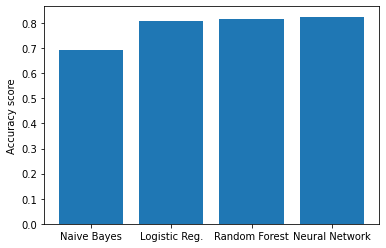

In [22]:
import matplotlib.pyplot as plt

plt.bar(['Naive Bayes', 'Logistic Reg.', 'Random Forest', 'Neural Network'], [nb_accuracy, log_accuracy, rf_accuracy, nn_accuracy])
plt.ylabel('Accuracy score')
plt.show()

## Data for submission

In [23]:
subm_data = pd.read_csv('../input/word2vec-nlp-tutorial/testData.tsv.zip', sep = '\t')

In [24]:
subm_data.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


### Data clean-up

In [25]:
for i in range(len(data_train)):
    subm_data["review"][i] = BeautifulSoup(subm_data["review"][i]).get_text()
    subm_data["review"][i] = re.sub("[,.;:'-*]", " ", subm_data["review"][i])
    subm_data["review"][i] = subm_data["review"][i].lower()

for w in stopwords.words('english'):
    subm_data['review'] = subm_data["review"].str.replace(' ' + str(w) + ' ', ' ')
    
for i in range(len(data_train)):
    subm_data['review'][i] = subm_data['review'][i].split(' ')
    subm_data['review'][i] = [lancaster.stem(y) for y in subm_data['review'][i]]
    subm_data['review'][i] = ' '.join(subm_data['review'][i])
    
vectorizer = CountVectorizer(max_features = 5000) 

x_subm = vectorizer.fit_transform(subm_data['review']).toarray()
x_subm = sc.fit_transform(x_subm)

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [26]:
subm_predictions = nn_model.predict(x_subm)

In [27]:
subm_predictions[subm_predictions >= 0.5] = 1
subm_predictions[subm_predictions < 0.5] = 0

In [28]:
my_submission = pd.DataFrame()
my_submission["id"] = subm_data["id"]
my_submission["sentiment"] = subm_predictions
my_submission.to_csv('submission.csv', index=False)